# Descriptive Analysis of Metaphors
----------

In [450]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import ast

In [451]:
# Read the data
data = pd.read_csv('data/Final_data.csv')
data.head(5)

,Unnamed: 0,Date,Media,Member,Link,Information,Questions,Answers,Metaphors,Metaphors Sentence,...,pos_metaphors_len,Sentences,Frequency,Sentences_len,Sentence_GPT_Majority,GPT_Majority_Category,Matched_Metaphors,pos_relationships,pos_sentences,pos_relationships_len
0,0,2005-12-23,Interview with Der Spiegel,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"SPIEGEL: Monsieur Trichet, any concrete uttera...",The publication of the translation was authori...,NaN,NaN,...,0,['We will in the future take the decisions tha...,5,3,['we will in the future take the decisions tha...,"['machine', 'disease', 'plant']","[True, True, True]","[('inflationary', 'expectation'), ('inflation'...",[],3
1,1,2005-12-19,Interview with Hospodářské Noviny,Otmar Issing,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,The new EU member states want to adopt the eur...,These questions are all closely related to eac...,NaN,NaN,...,0,['We are not confronted with deflation but wit...,1,1,['we are not confronted with deflation but wit...,['warfare'],[True],[],[],0
2,2,2005-12-19,Interview with Financial Times and Financial T...,Lucas Papademos,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"Mr Papademos, you have responsibility as ECB V...",A comparison of the risks involved when short-...,NaN,NaN,...,2,['If longterm interest rates remain at a low l...,18,11,['in the us the policy stance changed and the ...,"['fire', 'fire', 'fire', 'fire']","[True, True, True, True]","[('future', 'inflation'), ('low', 'inflation')...",['it a higher level of interest rates could fo...,8
3,3,2005-12-15,Interview with Paris Match,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,Paris Match. After two uneventful years at the...,The publication of the translation was authori...,NaN,NaN,...,0,['You are exaggerating the increase in the cos...,7,5,['furthermore we must not wait until inflation...,"['warfare', 'disease', 'disease', 'machine', '...","[True, True, True, True, True]","[('inflationary', 'remain'), ('inflationary', ...",[],2
4,4,2005-12-09,Interview in Il Giornale,Lorenzo Bini Smaghi,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"However, Europe’s politicians, with few except...","By Angelo Allegri, our correspondent in Frankf...",NaN,NaN,...,0,['The rise has helped to keep inflation expect...,7,7,['the rise has helped to keep inflation expect...,"['orientation', 'orientation', 'orientation', ...","[True, True, True, True, True, True, True]","[('inflation', 'regard')]",[],1


In [452]:
# Add a column with the total number of true in the list for each row for the column "Matched Metaphors"
data['Count_Metaphors'] = data['Matched_Metaphors'].apply(lambda x: x.count('True'))

In [453]:
data.head(5)

,Unnamed: 0,Date,Media,Member,Link,Information,Questions,Answers,Metaphors,Metaphors Sentence,...,Sentences,Frequency,Sentences_len,Sentence_GPT_Majority,GPT_Majority_Category,Matched_Metaphors,pos_relationships,pos_sentences,pos_relationships_len,Count_Metaphors
0,0,2005-12-23,Interview with Der Spiegel,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"SPIEGEL: Monsieur Trichet, any concrete uttera...",The publication of the translation was authori...,NaN,NaN,...,['We will in the future take the decisions tha...,5,3,['we will in the future take the decisions tha...,"['machine', 'disease', 'plant']","[True, True, True]","[('inflationary', 'expectation'), ('inflation'...",[],3,3
1,1,2005-12-19,Interview with Hospodářské Noviny,Otmar Issing,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,The new EU member states want to adopt the eur...,These questions are all closely related to eac...,NaN,NaN,...,['We are not confronted with deflation but wit...,1,1,['we are not confronted with deflation but wit...,['warfare'],[True],[],[],0,1
2,2,2005-12-19,Interview with Financial Times and Financial T...,Lucas Papademos,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"Mr Papademos, you have responsibility as ECB V...",A comparison of the risks involved when short-...,NaN,NaN,...,['If longterm interest rates remain at a low l...,18,11,['in the us the policy stance changed and the ...,"['fire', 'fire', 'fire', 'fire']","[True, True, True, True]","[('future', 'inflation'), ('low', 'inflation')...",['it a higher level of interest rates could fo...,8,4
3,3,2005-12-15,Interview with Paris Match,Jean-Claude Trichet,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,Paris Match. After two uneventful years at the...,The publication of the translation was authori...,NaN,NaN,...,['You are exaggerating the increase in the cos...,7,5,['furthermore we must not wait until inflation...,"['warfare', 'disease', 'disease', 'machine', '...","[True, True, True, True, True]","[('inflationary', 'remain'), ('inflationary', ...",[],2,5
4,4,2005-12-09,Interview in Il Giornale,Lorenzo Bini Smaghi,https://www.ecb.europa.eu/press/inter/date/200...,Information not found,"However, Europe’s politicians, with few except...","By Angelo Allegri, our correspondent in Frankf...",NaN,NaN,...,['The rise has helped to keep inflation expect...,7,7,['the rise has helped to keep inflation expect...,"['orientation', 'orientation', 'orientation', ...","[True, True, True, True, True, True, True]","[('inflation', 'regard')]",[],1,7


# DESCRIPTIVE ANALYSIS

### 1. Who uses the most metaphors ? 

### Member

In [454]:
# Convert all entries to strings and handle missing values
data['Answers'] = data['Answers'].astype(str).fillna('')

# Function to count words in a speech
def count_words(speech):
    return len(speech.split())

# Add a column with the total number of words in each speech
data['Speech_Total_Words'] = data['Answers'].apply(count_words)

# Group by member and sum the total number of words
total_words_by_member = data.groupby('Member')['Speech_Total_Words'].sum().reset_index()

# Group by member and sum the total number of metaphors
total_metaphors_by_member = data.groupby('Member')['Count_Metaphors'].sum().reset_index()

# Merge the two DataFrames on the Member column
merged_df = pd.merge(total_words_by_member, total_metaphors_by_member, on='Member')

# Calculate the ratio of metaphors to total words
merged_df['Member_Metaphors_Per_Word'] = ((merged_df['Count_Metaphors'] / merged_df['Speech_Total_Words'])).round(5)
merged_df['Member_Metaphors_Per_Word'].sort_values(ascending=False)

# Sort the results from the member using the most metaphors per word to the least
merged_df = merged_df.sort_values(by='Member_Metaphors_Per_Word', ascending=False).reset_index(drop=True)

merged_df

# Merge the ratio back into the original data
data = pd.merge(data, merged_df[['Member', 'Member_Metaphors_Per_Word']], on='Member', how='left')


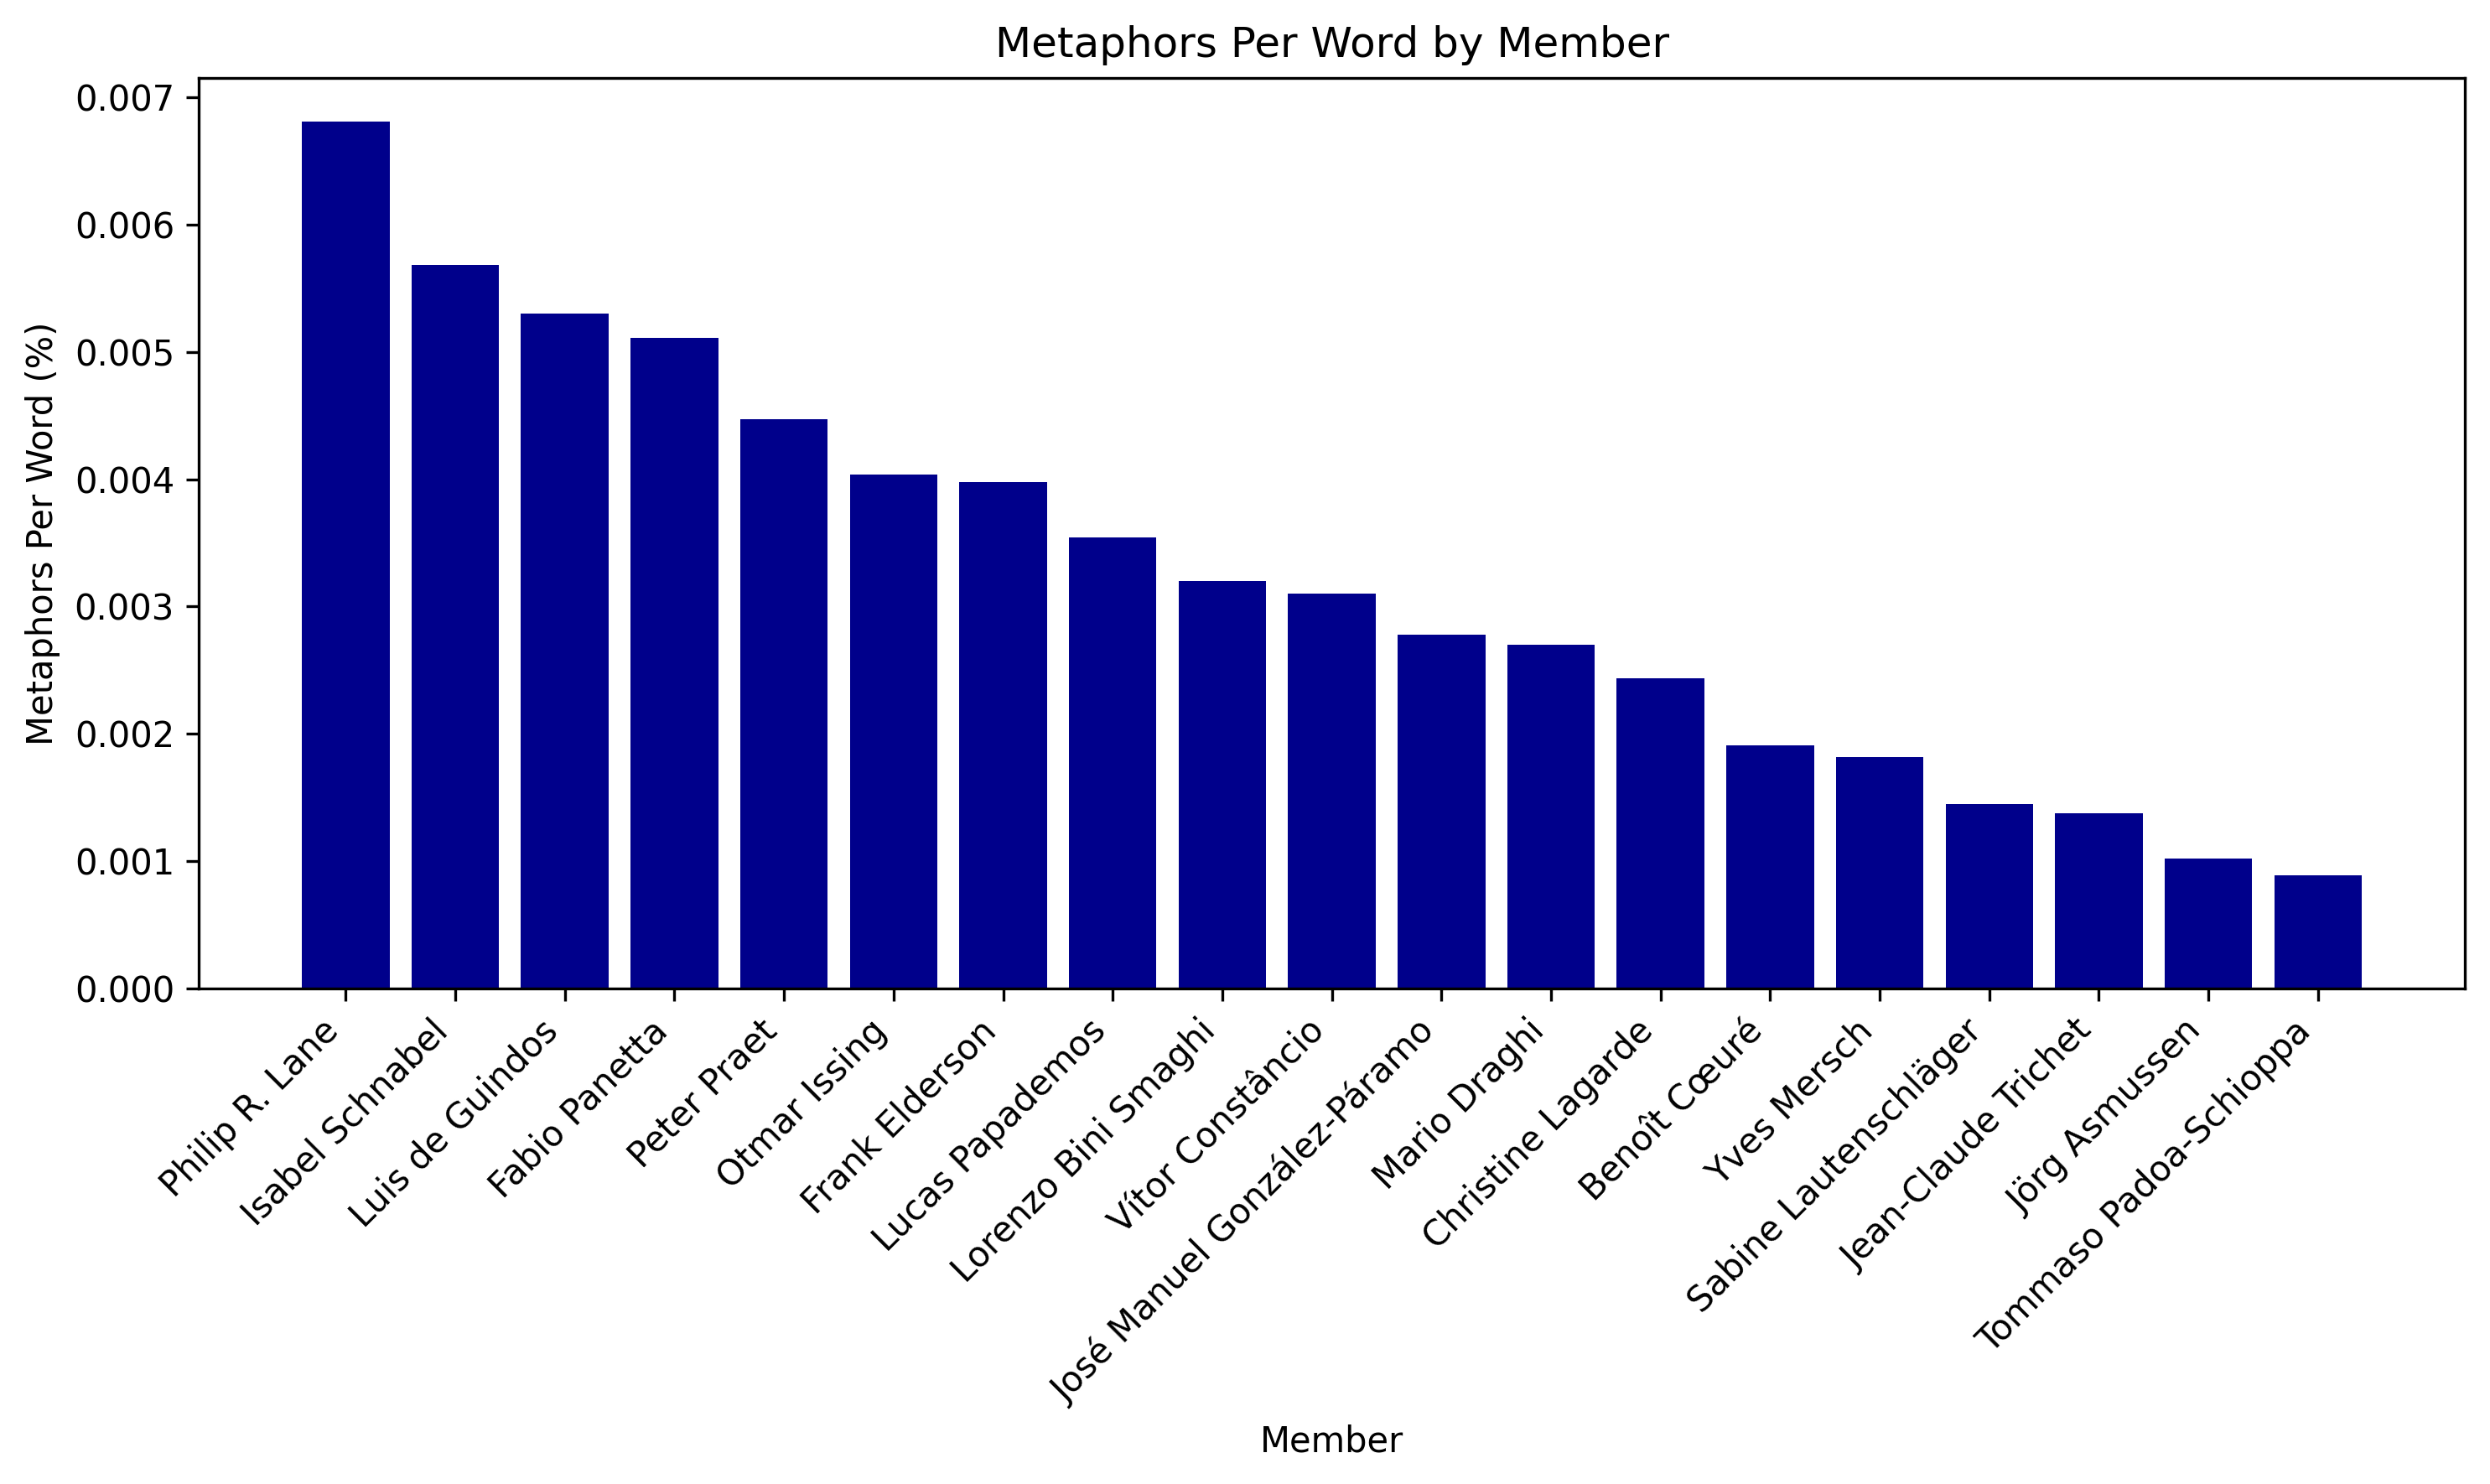

In [455]:
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(merged_df['Member'], merged_df['Member_Metaphors_Per_Word'], color='darkblue')
plt.xlabel('Member')
plt.ylabel('Metaphors Per Word (%)')
plt.title('Metaphors Per Word by Member')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Gender

In [456]:
# Group by gender and calculate the total number of metaphors and words
gender_stats = data.groupby('Gender').agg({
    'Count_Metaphors': 'sum',
    'Speech_Total_Words': 'sum'
}).reset_index()

# Calculate the ratio of metaphors per word for each gender
gender_stats['Member_Metaphors_Per_Word'] = ((gender_stats['Count_Metaphors'] / gender_stats['Speech_Total_Words']) * 100).round(2)
gender_stats

,Gender,Count_Metaphors,Speech_Total_Words,Member_Metaphors_Per_Word
0,F,697,188342,0.37
1,M,2265,636450,0.36


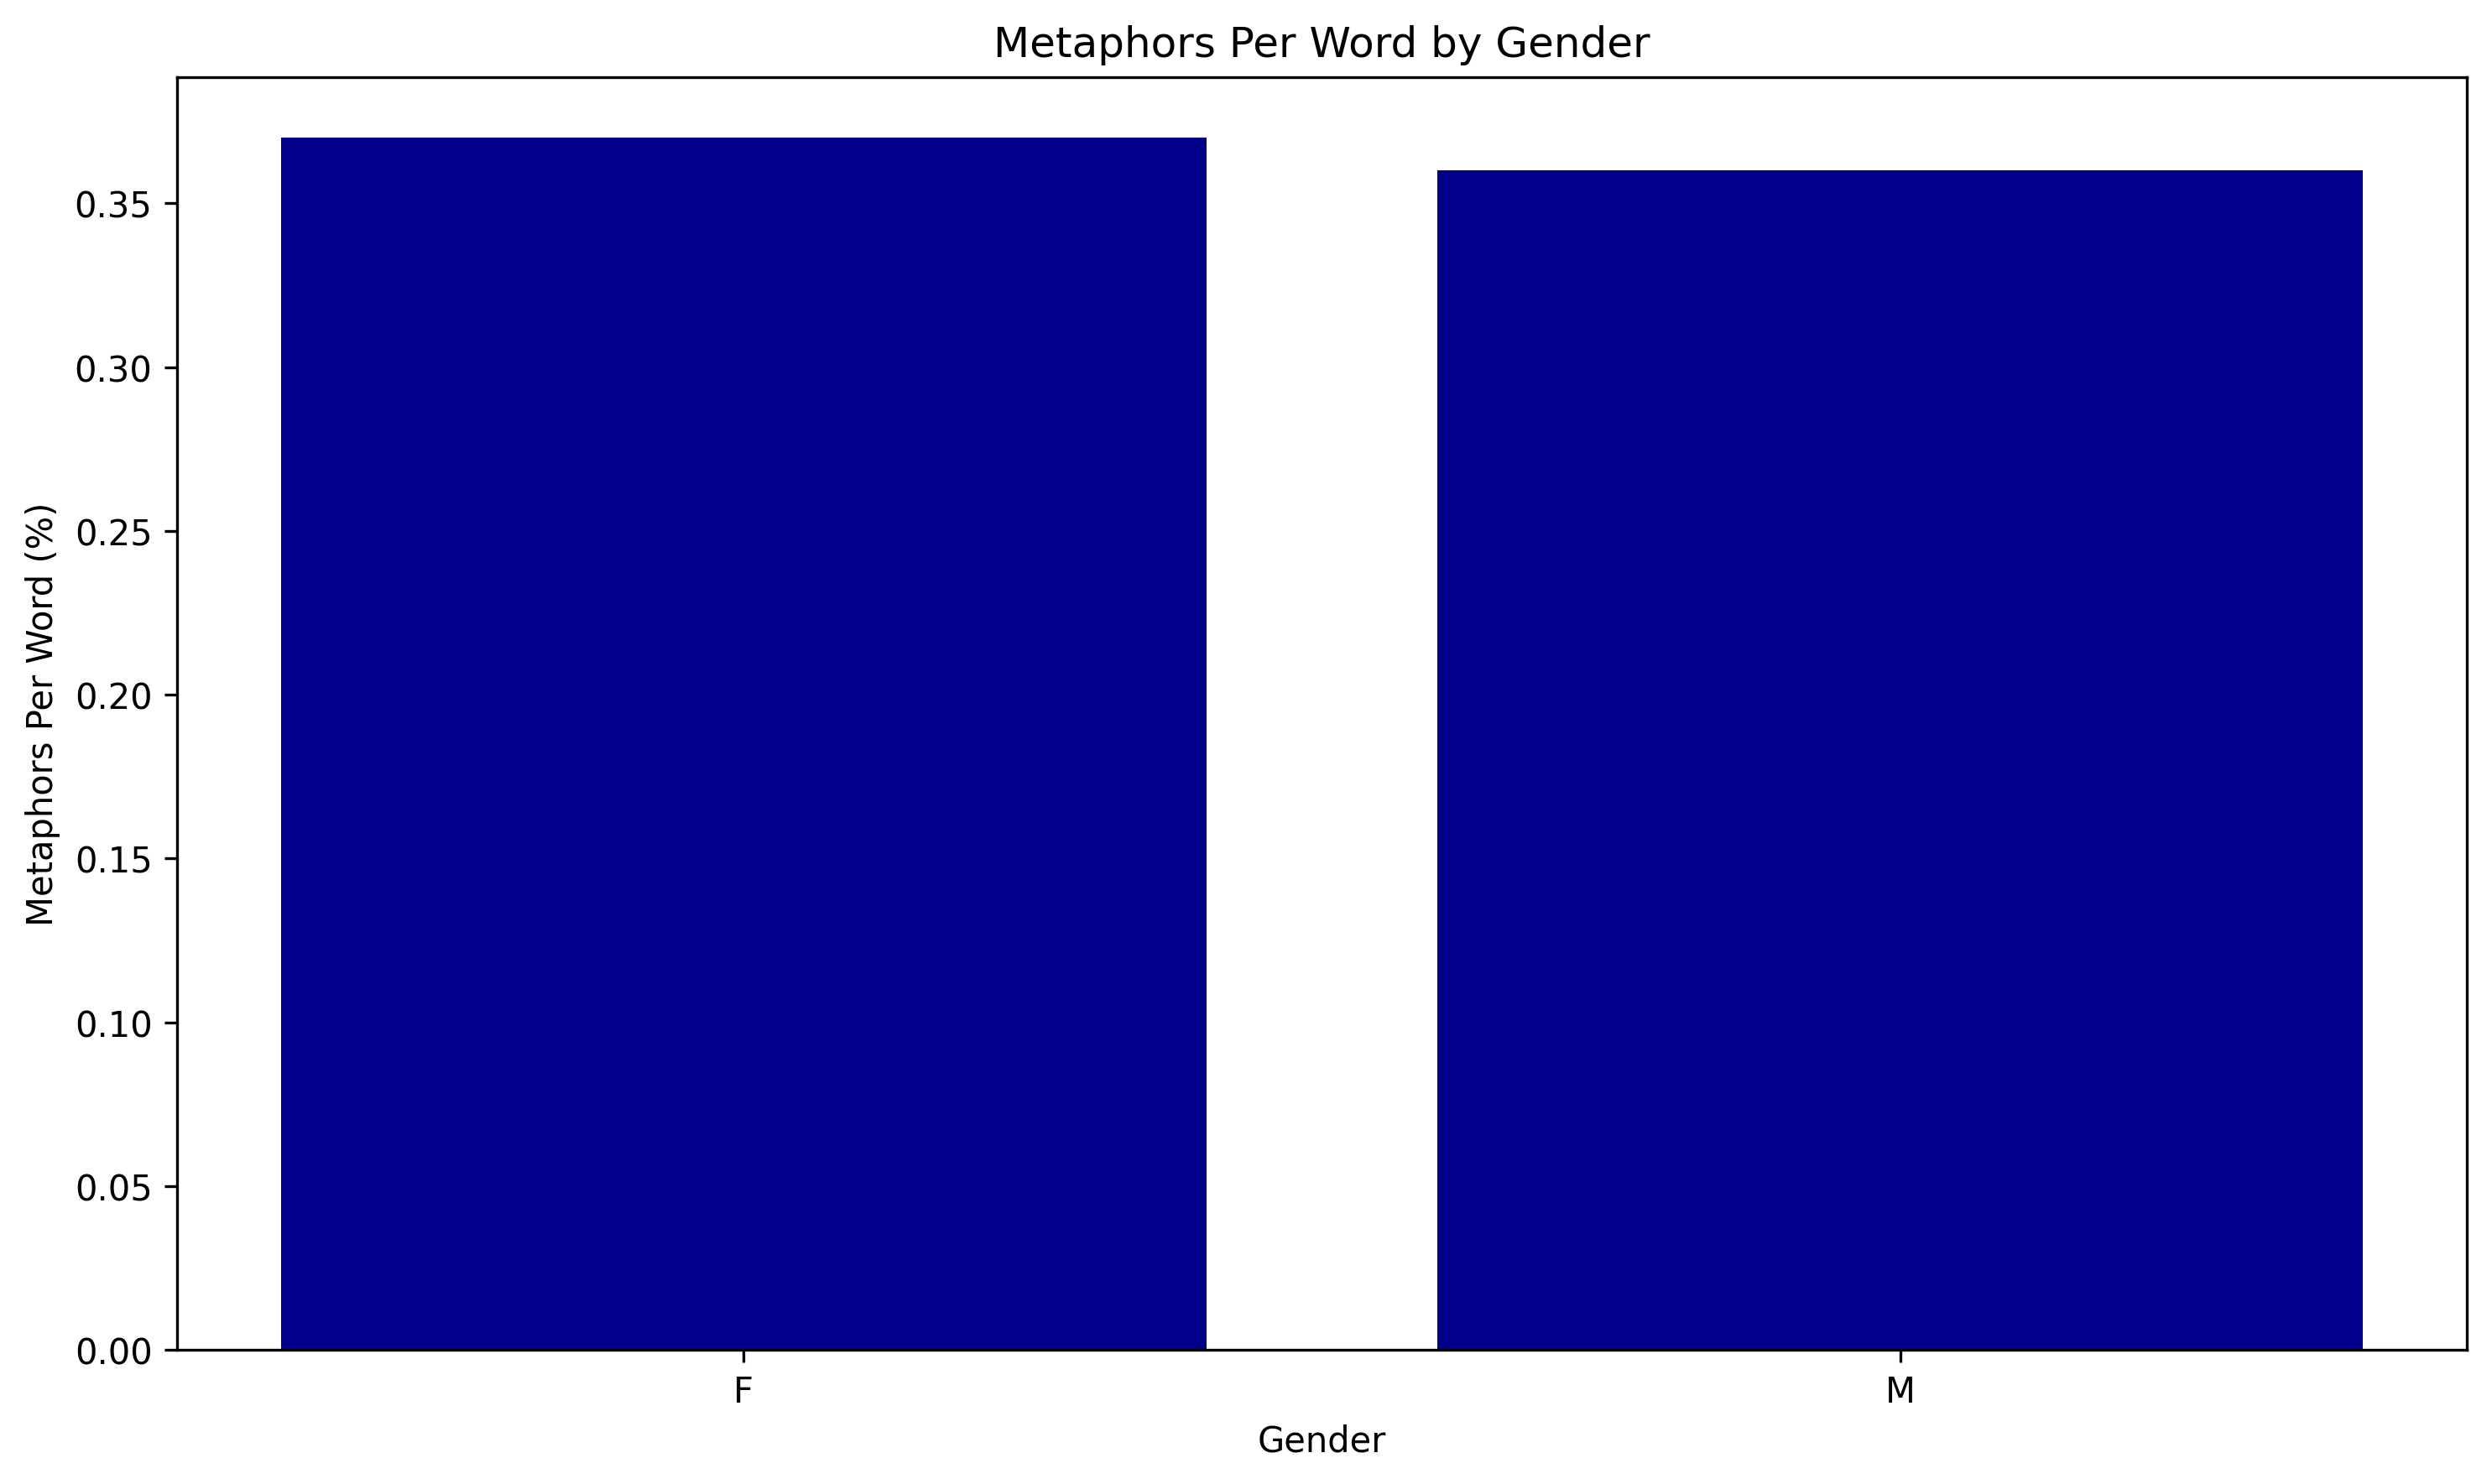

In [457]:
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(gender_stats['Gender'], gender_stats['Member_Metaphors_Per_Word'], color='darkblue')
plt.xlabel('Gender')
plt.ylabel('Metaphors Per Word (%)')
plt.title('Metaphors Per Word by Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Year of Birth

In [458]:
# Group by year of birth and calculate the total number of metaphors and words
year_stats = data.groupby('YoB').agg({
    'Count_Metaphors': 'sum',
    'Speech_Total_Words': 'sum'
}).reset_index()

# Calculate the ratio of metaphors per word for each year of birth
year_stats['Member_Metaphors_Per_Word'] = ((year_stats['Count_Metaphors'] / year_stats['Speech_Total_Words']) * 100).round(2)
year_stats

,YoB,Count_Metaphors,Speech_Total_Words,Member_Metaphors_Per_Word
0,1936,7,1734,0.40
1,1940,1,1120,0.09
2,1942,148,106897,0.14
3,1943,87,28060,0.31
4,1947,128,45488,0.28
5,1949,328,89967,0.36
6,1956,188,75984,0.25
7,1958,9,3233,0.28
8,1959,151,29568,0.51
9,1960,364,68727,0.53


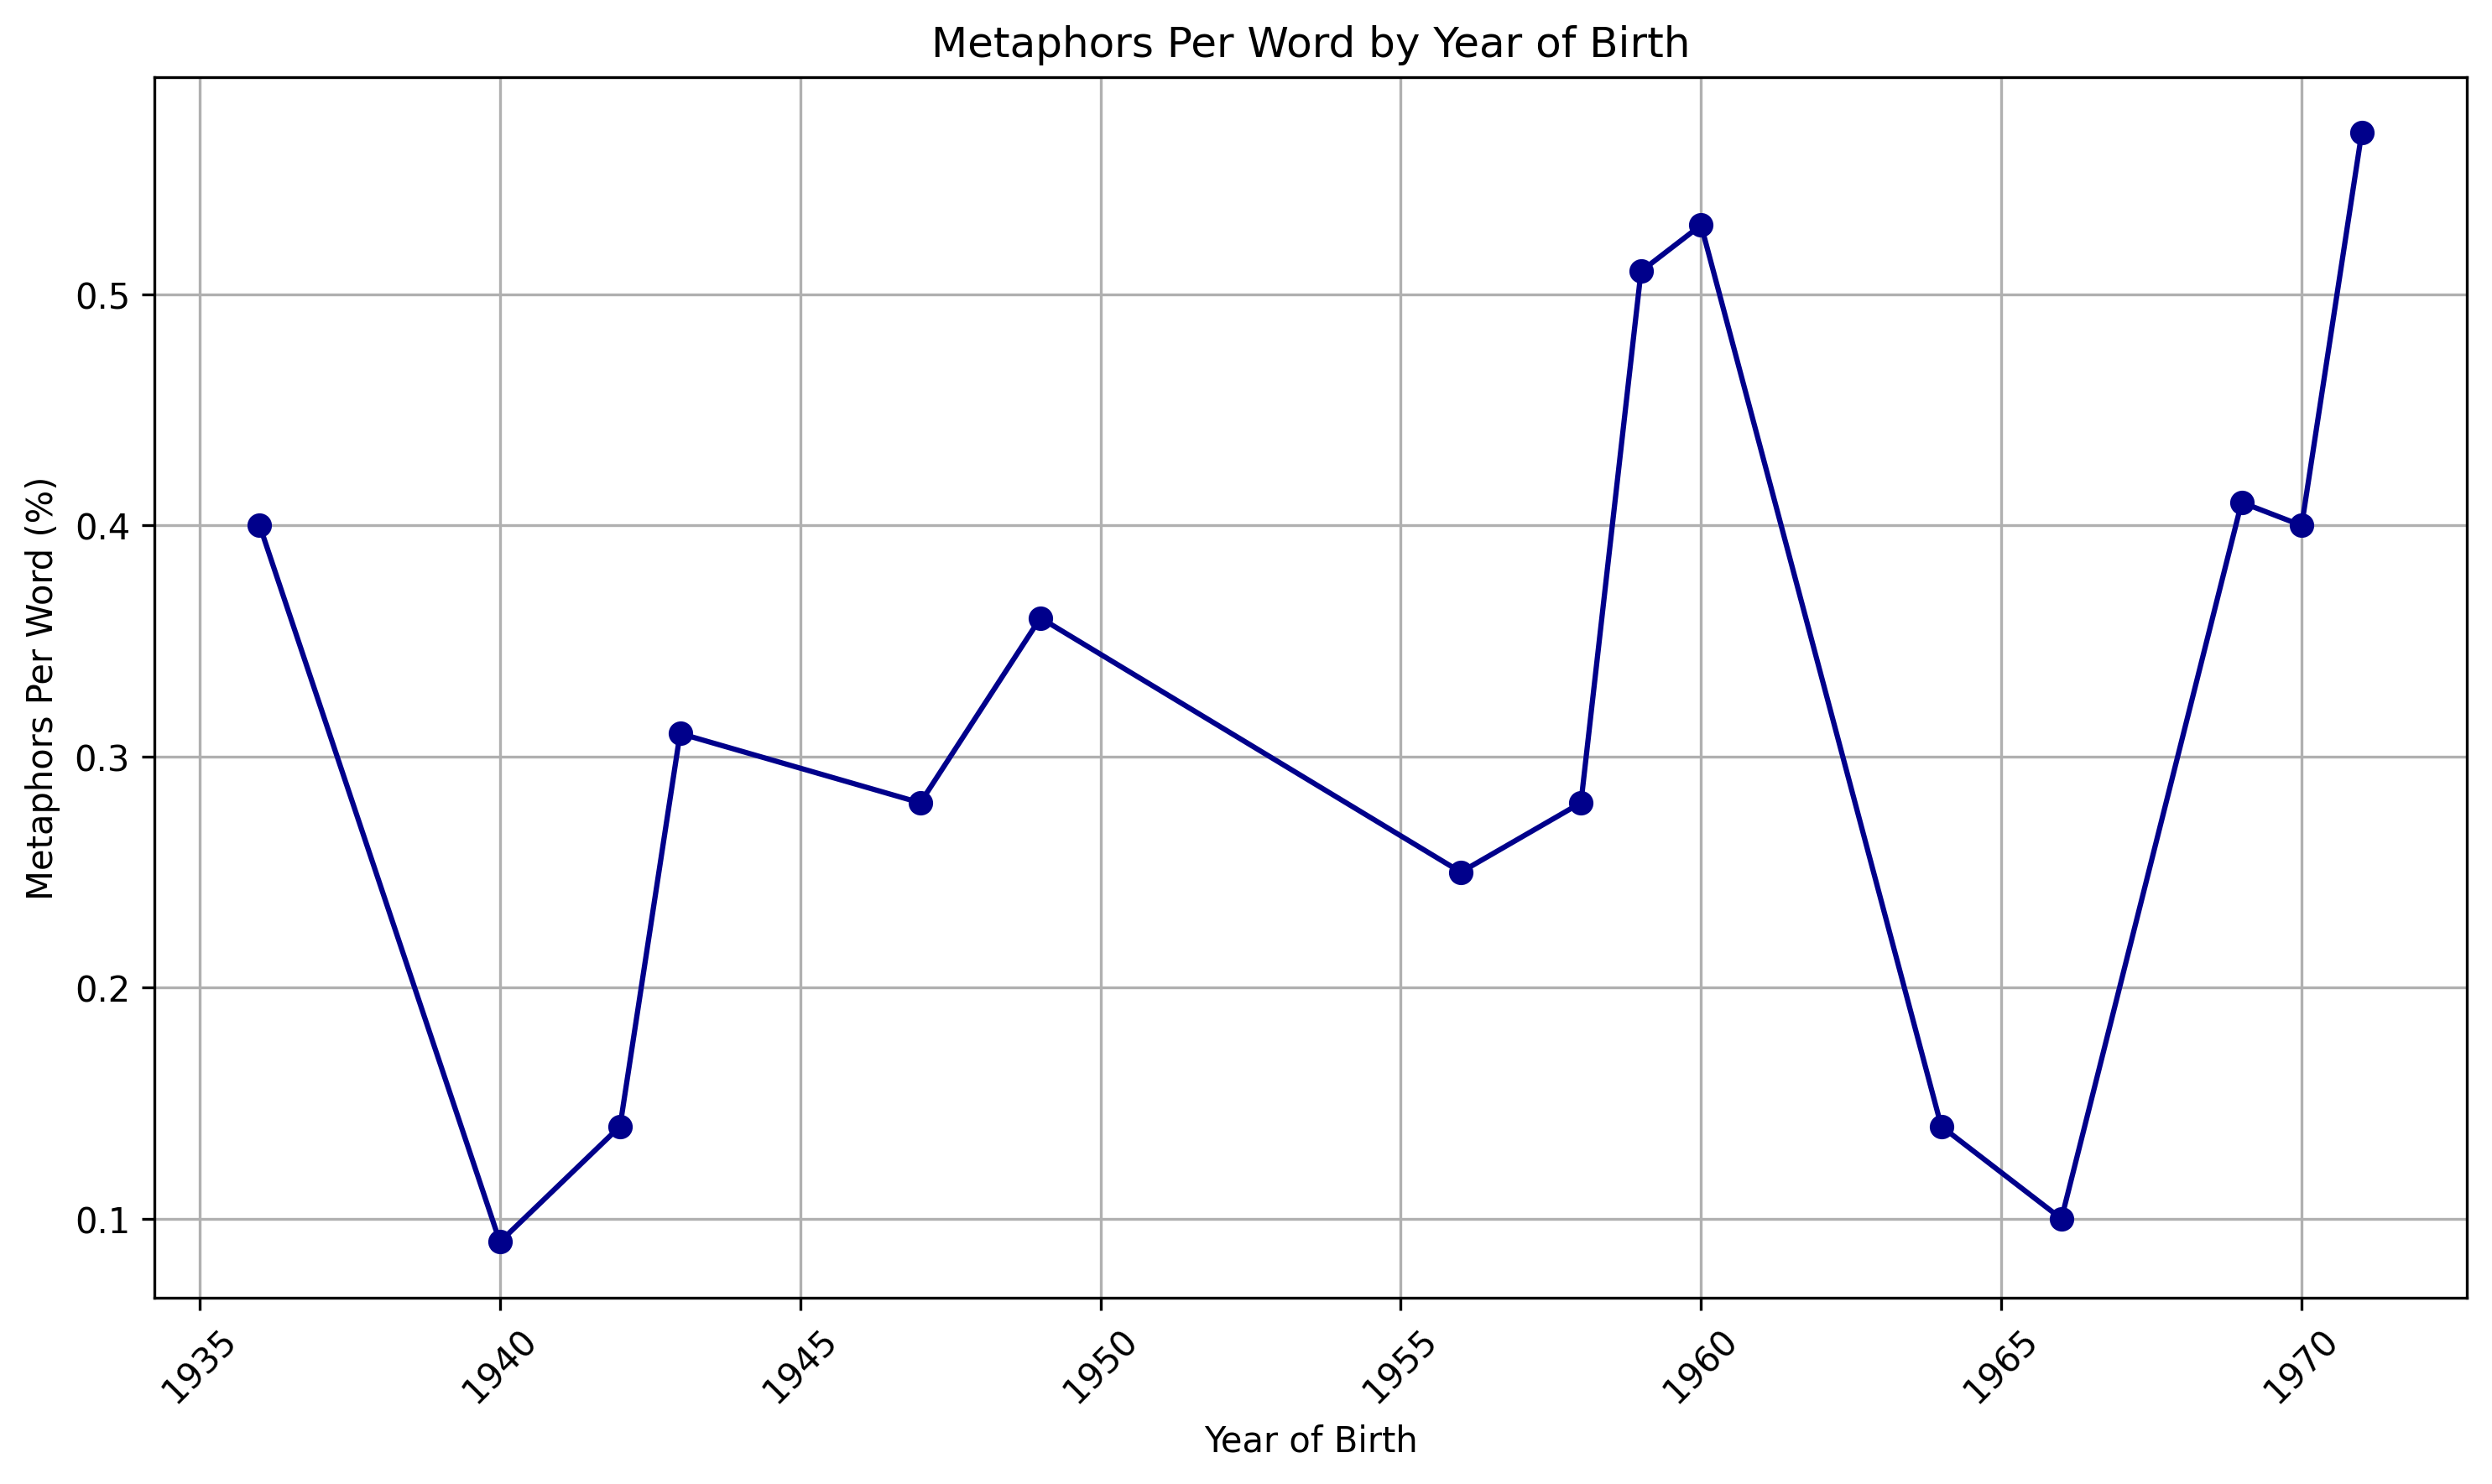

In [459]:
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(year_stats['YoB'], year_stats['Member_Metaphors_Per_Word'], marker='o', linestyle='-', color='darkblue')
plt.xlabel('Year of Birth')
plt.ylabel('Metaphors Per Word (%)')
plt.title('Metaphors Per Word by Year of Birth')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. What type of metaphor category is the most common ? 

In [460]:
data['GPT_Majority_Category'] = data['GPT_Majority_Category'].apply(ast.literal_eval)
to_remove_lst = ["orientation"]

# Function to remove specific words from lists
def remove_specific_words(category_list, words_to_remove):
    return [category for category in category_list if category not in words_to_remove]

# Apply the function to remove specific words
for word in to_remove_lst:
    data['GPT_Majority_Category'] = data['GPT_Majority_Category'].apply(lambda x: remove_specific_words(x, [word]))


In [461]:
# Define a safe function to convert strings to lists
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        print(f"Skipping malformed entry: {val}")
        return []

# Apply the function to the GPT_Majority_Category column
data['GPT_Majority_Category'] = data['GPT_Majority_Category'].apply(safe_literal_eval)

# Flatten the list of categories
all_categories = [category for sublist in data['GPT_Majority_Category'] for category in sublist]

# Count the total number of each category
category_counts = Counter(all_categories)

# Convert to DataFrame for easier analysis
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])
category_df['Percentage'] = (category_df['Count'] / category_df['Count'].sum()) * 100

print("Category Counts and Percentages:")
print(category_df)

Skipping malformed entry: ['machine', 'disease', 'plant']
Skipping malformed entry: ['warfare']
Skipping malformed entry: ['fire', 'fire', 'fire', 'fire']
Skipping malformed entry: ['warfare', 'disease', 'disease', 'machine', 'plant']
Skipping malformed entry: ['other']
Skipping malformed entry: ['disease', 'disease', 'disease', 'disease', 'plant']
Skipping malformed entry: ['other', 'other', 'other']
Skipping malformed entry: ['machine', 'disease', 'machine', 'other', 'other', 'warfare', 'other']
Skipping malformed entry: ['other', 'other', 'machine']
Skipping malformed entry: ['disease', 'other', 'other', 'liquids', 'disease']
Skipping malformed entry: []
Skipping malformed entry: ['other', 'other', 'other', 'other', 'other', 'other', 'other']
Skipping malformed entry: []
Skipping malformed entry: ['fire']
Skipping malformed entry: ['plant', 'liquids', 'other', 'other', 'other']
Skipping malformed entry: []
Skipping malformed entry: ['warfare', 'other']
Skipping malformed entry: []
S

### By Member

In [462]:
# Group by member to see which speakers use which categories most frequently
member_category_counts = data.explode('GPT_Majority_Category').groupby(['Member', 'GPT_Majority_Category']).size().unstack(fill_value=0)

print("\nCategory Usage by Member:")
member_category_counts


Category Usage by Member:


GPT_Majority_Category
Member


In [463]:
# Group by member to see which speakers use which categories most frequently
member_category_counts = data.explode('GPT_Majority_Category').groupby(['Member', 'GPT_Majority_Category']).size().unstack(fill_value=0)

# Identify the most frequent category for each member
most_frequent_category = member_category_counts.idxmax(axis=1)
most_frequent_count = member_category_counts.max(axis=1)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Member': most_frequent_category.index,
    'Most Frequent Category': most_frequent_category.values,
    'Count': most_frequent_count.values
})

# Display the summary table
print("\nMost Frequent Metaphor Category by Member:")
summary_df


Most Frequent Metaphor Category by Member:


,Member,Most Frequent Category,Count


By Gender

In [464]:
# Group by gender to see which gender uses which categories most frequently
gender_category_counts = data.explode('GPT_Majority_Category').groupby(['Gender', 'GPT_Majority_Category']).size().unstack(fill_value=0)

# Identify the most frequent category for each gender
most_frequent_category_gender = gender_category_counts.idxmax(axis=1)
most_frequent_count_gender = gender_category_counts.max(axis=1)

# Create a summary DataFrame
summary_gender_df = pd.DataFrame({
    'Gender': most_frequent_category_gender.index,
    'Most Frequent Category': most_frequent_category_gender.values,
    'Count': most_frequent_count_gender.values
})

# Display the summary table
print("\nMost Frequent Metaphor Category by Gender:")
print(summary_gender_df)


Most Frequent Metaphor Category by Gender:
Empty DataFrame
Columns: [Gender, Most Frequent Category, Count]
Index: []


By Year of Birth

In [465]:
# Group by year of birth to see trends over time
year_category_counts = data.explode('GPT_Majority_Category').groupby(['YoB', 'GPT_Majority_Category']).size().unstack(fill_value=0)

print("\nCategory Usage by Year of Birth:")
year_category_counts



Category Usage by Year of Birth:


GPT_Majority_Category
YoB


In [466]:
# Group by year of birth to see which year uses which categories most frequently
year_category_counts = data.explode('GPT_Majority_Category').groupby(['YoB', 'GPT_Majority_Category']).size().unstack(fill_value=0)

# Identify the most frequent category for each year of birth
most_frequent_category_year = year_category_counts.idxmax(axis=1)
most_frequent_count_year = year_category_counts.max(axis=1)

# Create a summary DataFrame
summary_year_df = pd.DataFrame({
    'Year_of_Birth': most_frequent_category_year.index,
    'Most Frequent Category': most_frequent_category_year.values,
    'Count': most_frequent_count_year.values
})

# Display the summary table
print("\nMost Frequent Metaphor Category by Year of Birth:")
summary_year_df


Most Frequent Metaphor Category by Year of Birth:


,Year_of_Birth,Most Frequent Category,Count
